# **Facial Emotion Recognition with Scikit-learn**

**Getting and Preparing the JAFFE Dataset**

In [19]:
# Import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40
import random

In [20]:
!wget -c "https://zenodo.org/record/3451524/files/jaffedbase.zip"
print("Unzipping the zip file 'jaffedbase.zip'")
!unzip -qo jaffedbase.zip

--2024-10-27 09:10:44--  https://zenodo.org/record/3451524/files/jaffedbase.zip
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/3451524/files/jaffedbase.zip [following]
--2024-10-27 09:10:45--  https://zenodo.org/records/3451524/files/jaffedbase.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 416 REQUESTED_RANGE_NOT_SATISFIABLE

    The file is already fully retrieved; nothing to do.

Unzipping the zip file 'jaffedbase.zip'


In [3]:
# Load the dataset from the disk

def get_label_from_filename(filename):
  index = filename.find('.')
  return filename[index+1:index+3]

rows=64
cols=64
channels=3
num_classes=7

emotion_to_int =  {"AN":0, "DI":1, "FE":2, "NE":3, "SA":4, "SU":5, "HA":6}
int_to_emotion =  {0:"AN", 1:"DI", 2:"FE", 3:"NE", 4:"SA", 5:"SU", 6:"HA"}
emotion_list = emotion_to_int.keys()

img_data_list = []
labels_list = []

print("Reading the Image files")
data_path = './jaffedbase/'
for img in os.listdir(data_path):
  if "tiff" not in img: continue # Process only img files
  # Read the image
  input_img = cv2.imread(data_path + "/" + img)
  input_img_resize = cv2.resize(input_img,(rows,cols))
  img_data_list.append(input_img_resize)

  # Read the label
  emotion = get_label_from_filename(img)
  emotion_int = emotion_to_int[emotion] # convert to index
  labels_list.append(emotion_int)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255 # Normalize between [0-1]
img_data = img_data.reshape((len(img_data), -1)) # Flatten the images
labels = np.array(labels_list)

num_images = img_data.shape[0]

# Split the data into train and test set
train_size = int(num_images*0.8) # reserve 80% for training, 20% for testing
train_images = img_data[0:train_size]
train_labels = labels[0:train_size]
test_images = img_data[train_size:]
test_labels = labels[train_size:]


print("Finished with the input and labels as follows: ")
print("train_images.shape: ", train_images.shape)
print("train_labels.shape: ", train_labels.shape)
print("test_images.shape: ", test_images.shape)
print("test_labels.shape: ", test_labels.shape)
print("The number of images: ", num_images)

Reading the Image files
Finished with the input and labels as follows: 
train_images.shape:  (170, 12288)
train_labels.shape:  (170,)
test_images.shape:  (43, 12288)
test_labels.shape:  (43,)
The number of images:  213


**Display some samples**

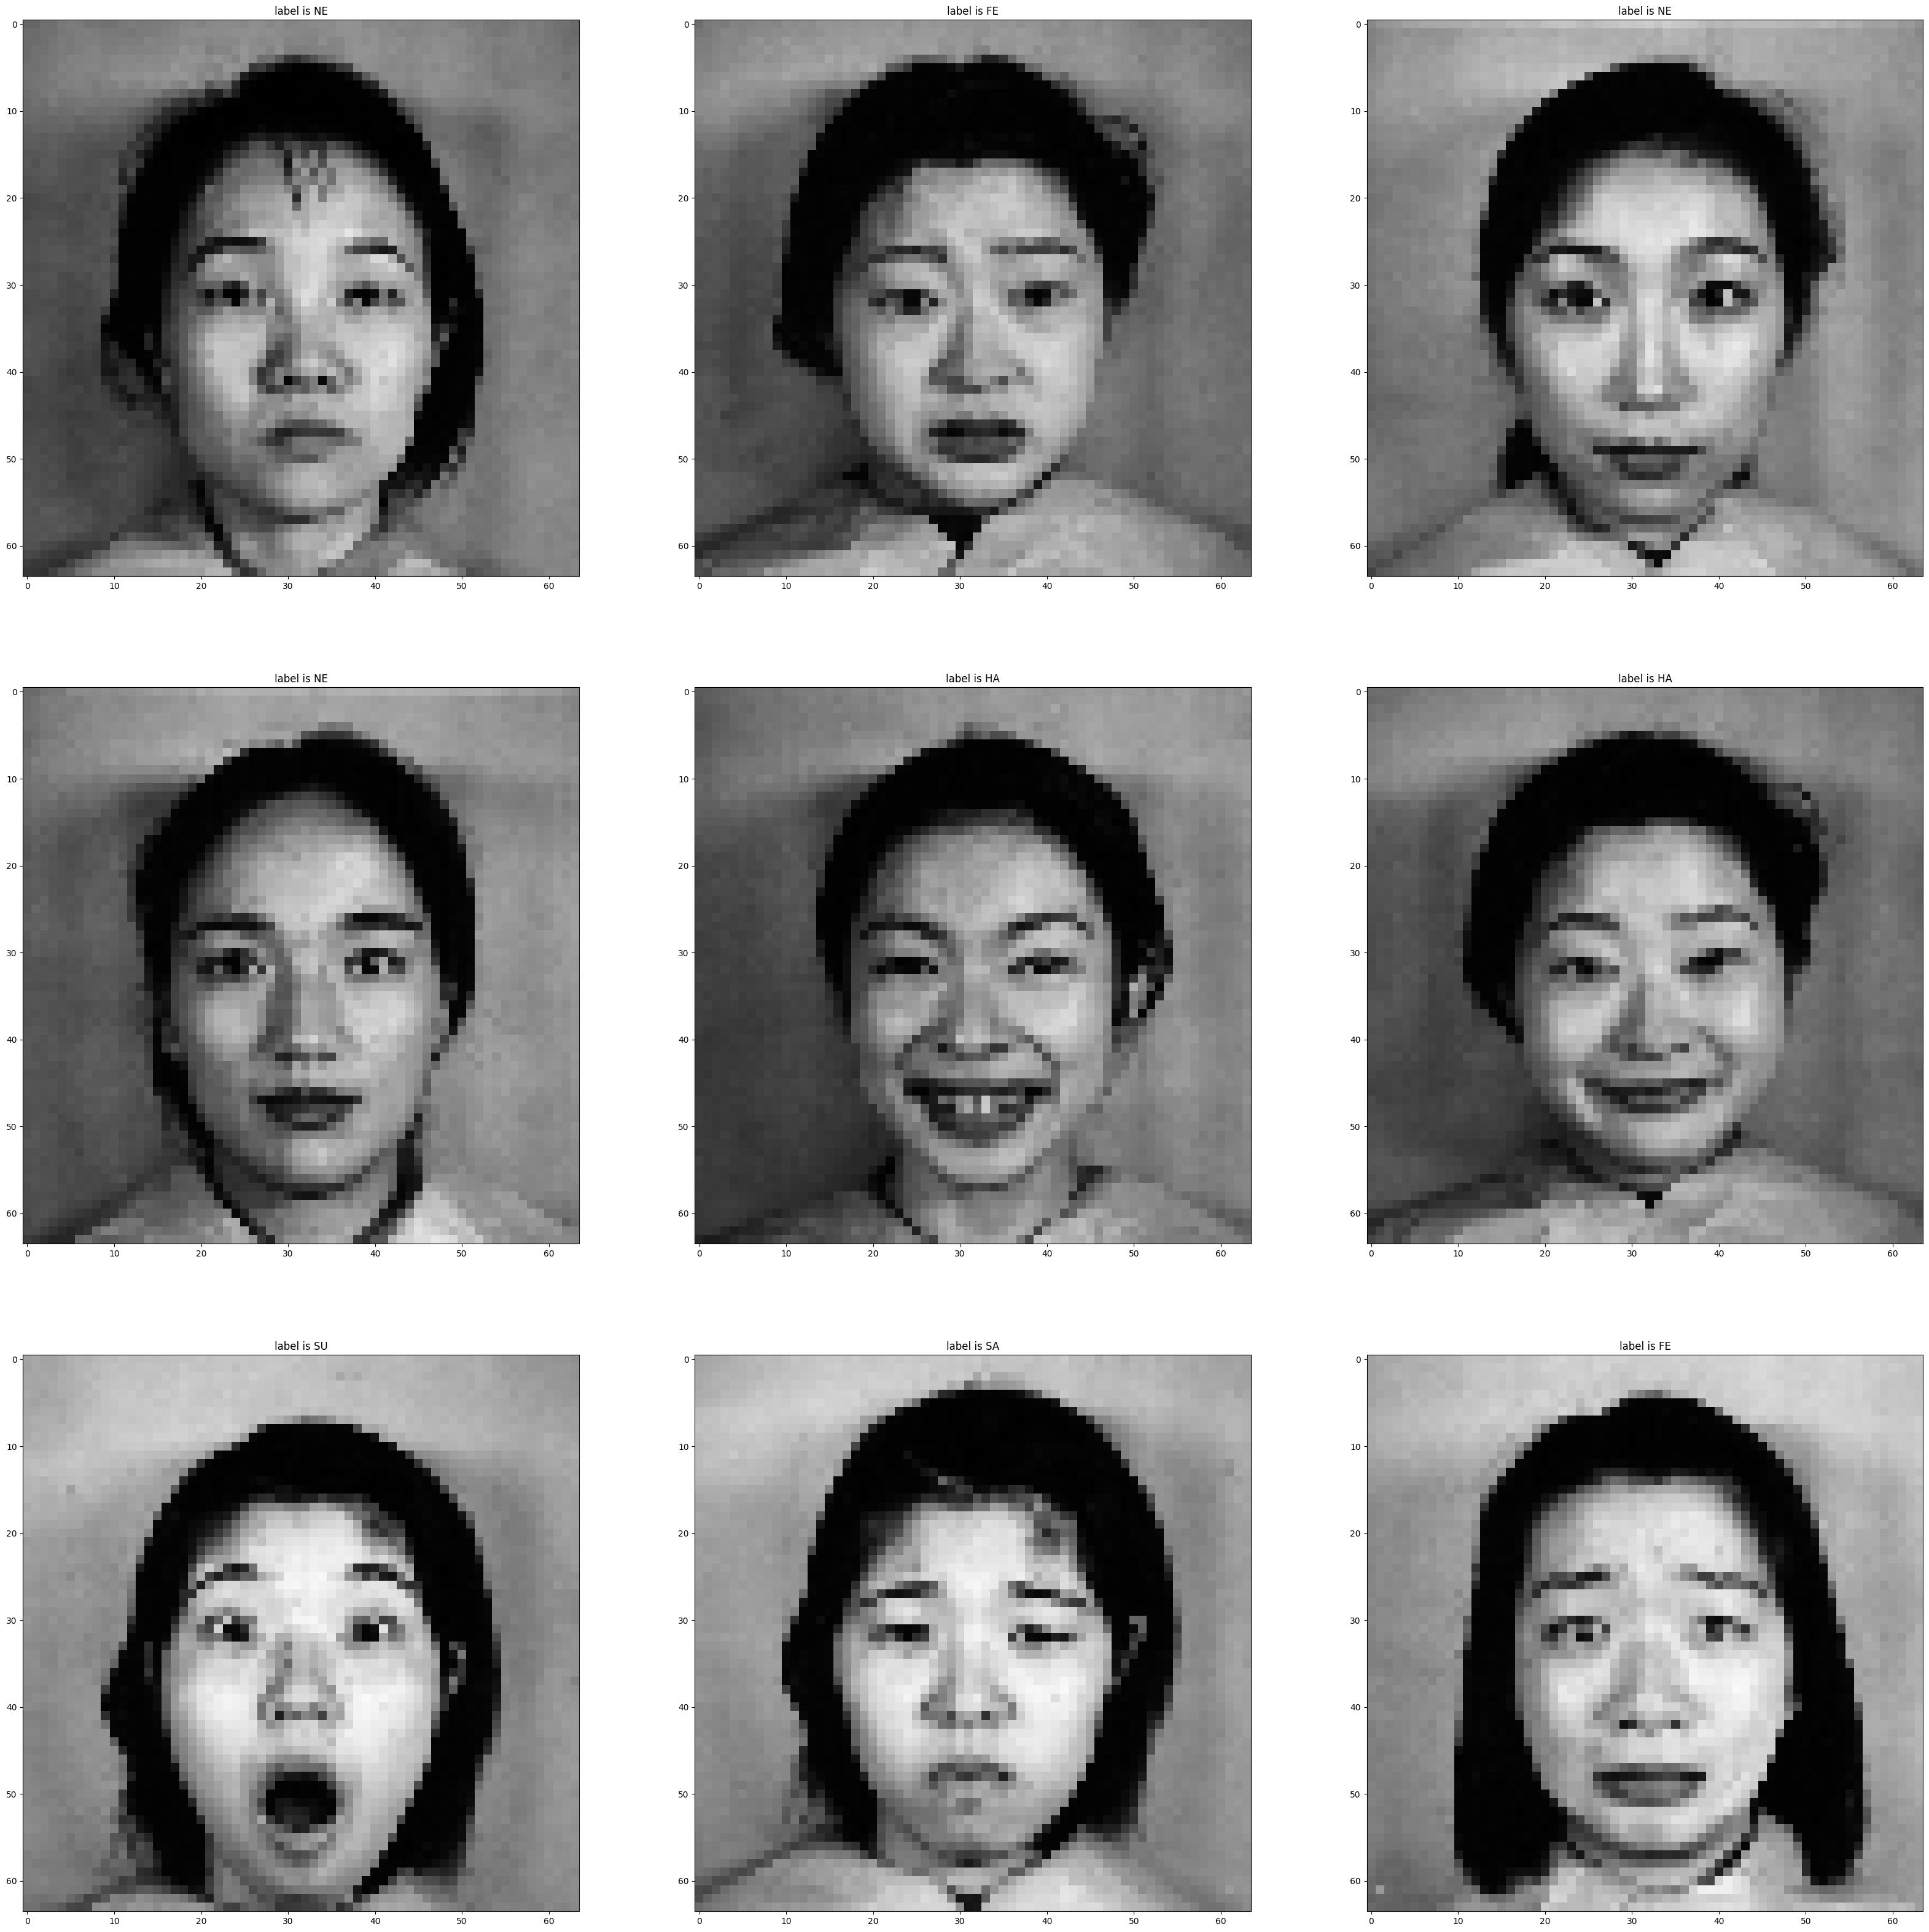

In [21]:
# Creating an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N)

for i in range(3):
  for j in range(3):
    index = random.randint(0, 213-1) # pick a random index
    img = img_data[index]
    img = img.reshape(cols, rows, channels)
    label = labels[index]
    axs[i, j].imshow(img)
    axs[i, j].set_title("label is " + int_to_emotion[label])

### **FER with Support Vector Machines (SVM)**

**Define an SVM model**

In [22]:
from sklearn import svm, metrics
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
print("classifier: ", classifier)

classifier:  SVC(gamma=0.001)


**Train SVM**

In [23]:
# We learn the SVM model on the training data
classifier.fit(train_images, train_labels)

# Now predict on the test data
predicted = classifier.predict(test_images)
expected = test_labels

**Results**

In [24]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.75      0.33      0.46         9
           2       0.25      0.33      0.29         6
           3       0.10      0.17      0.12         6
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.20      0.40      0.27         5

    accuracy                           0.30        43
   macro avg       0.29      0.27      0.26        43
weighted avg       0.36      0.30      0.31        43




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


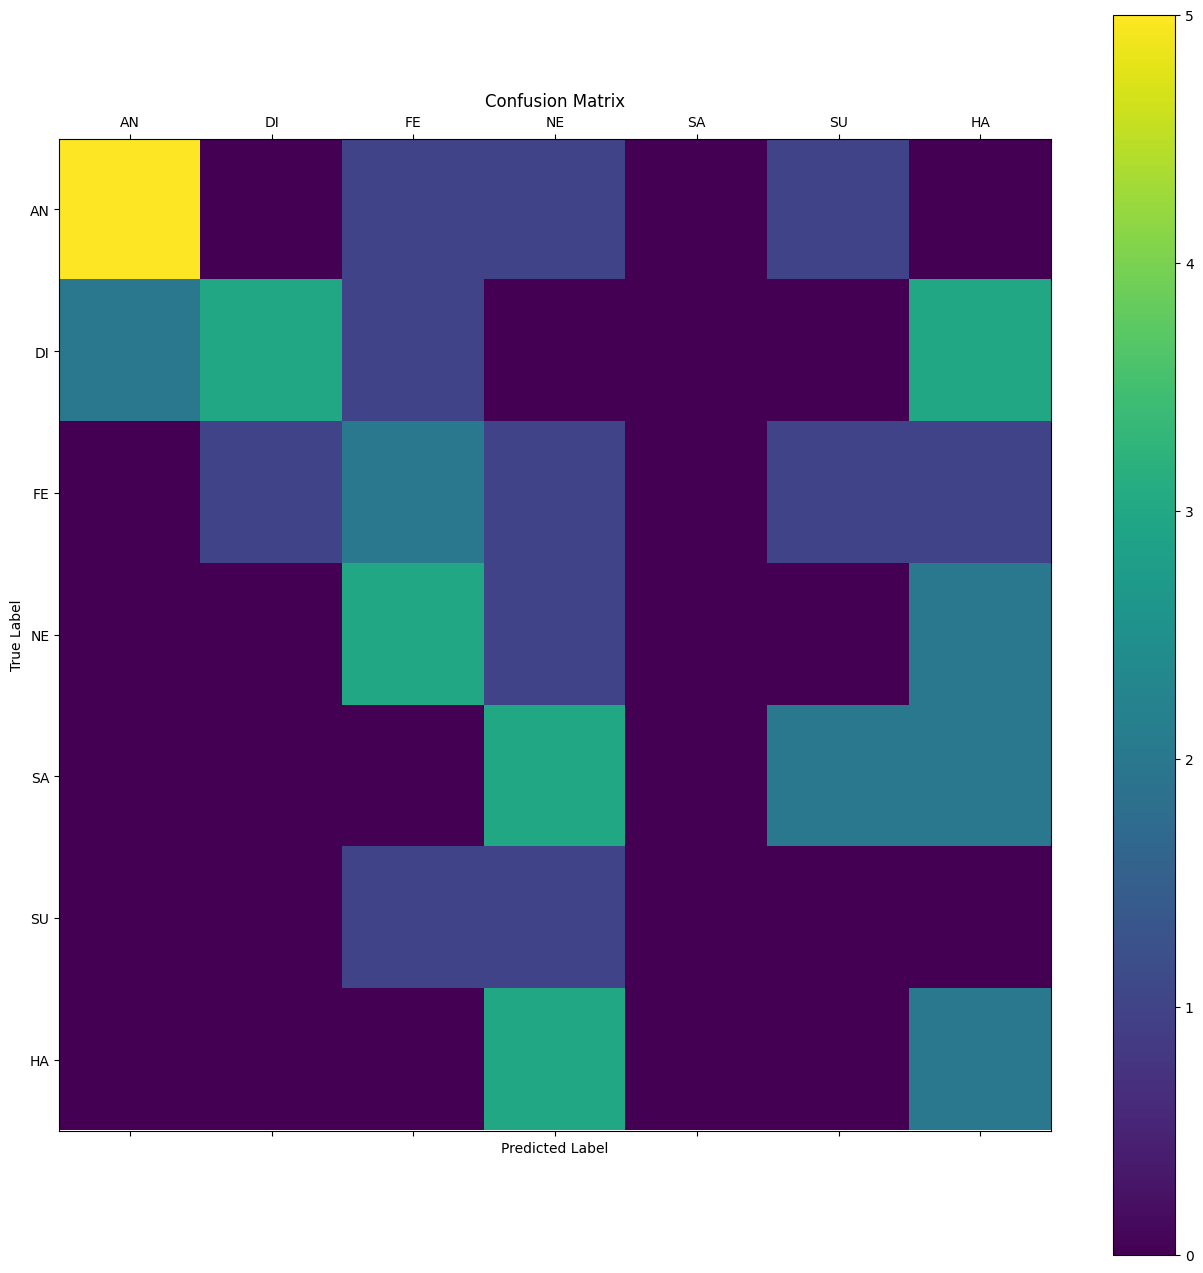

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predicted)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.show()

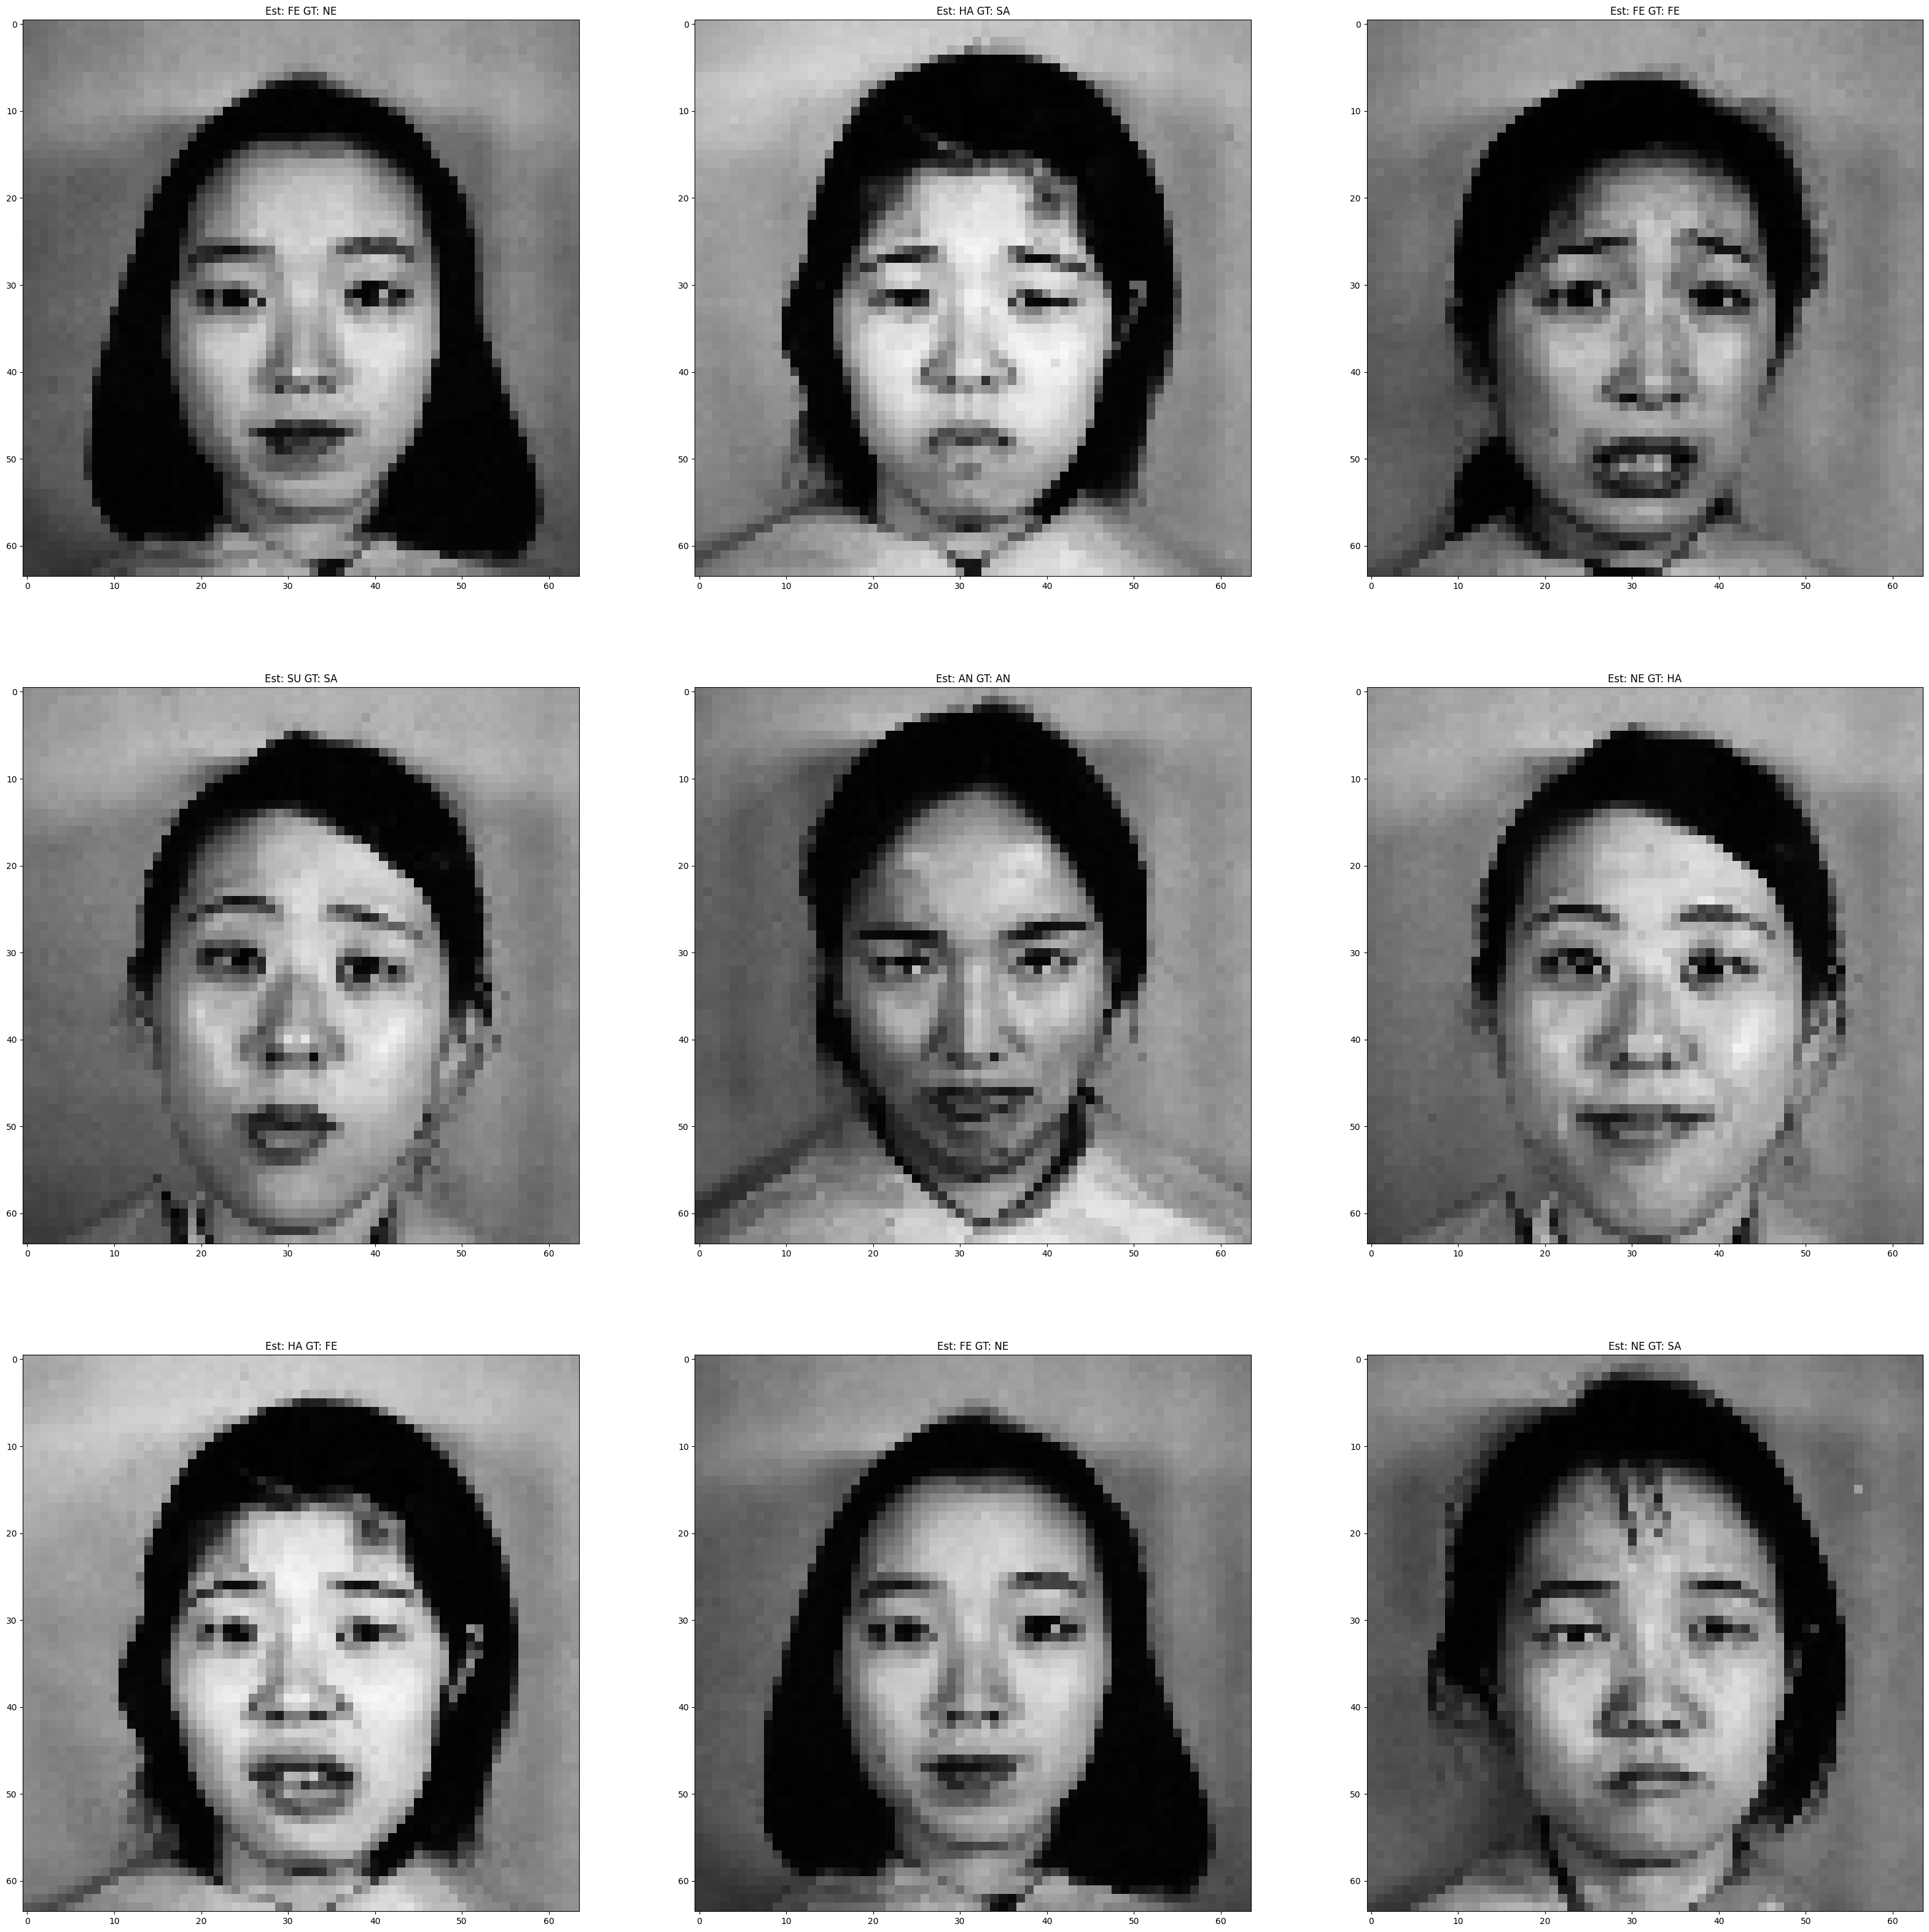

In [26]:
# Create an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N)

for i in range(3):
  for j in range(3):
    index = random.randint(0, len(test_images)-1) # pick a random index
    img = test_images[index].reshape(cols, rows, channels)
    correct_label = test_labels[index]
    predicted_label = predicted[index]

    axs[i, j].imshow(img)
    axs[i, j].set_title("Est: " + int_to_emotion[predicted_label] + " GT: " + int_to_emotion[correct_label])

**Grid Search for Hyper-Parameters**

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = KFold() # default n_splits = 5
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(train_images, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
# The best parameters are {'C': 10000.0, 'gamma': 0.001} with a score of 0.81

The best parameters are {'C': 10000000.0, 'gamma': 1e-06} with a score of 0.78


**Train the model with the best parameters**

In [28]:
best_SVM = svm.SVC(C=10000000.0, gamma=1e-06)
best_SVM.fit(train_images, train_labels)

SVC(C=10000000.0, gamma=1e-06)

**Evaluate the best model**

In [29]:
predicted = best_SVM.predict(test_images)
expected = test_labels

print("Classification report for classifier %s:\n%s\n"
      % (best_SVM, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=10000000.0, gamma=1e-06):
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      0.78      0.82         9
           2       0.75      1.00      0.86         6
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2
           6       1.00      0.80      0.89         5

    accuracy                           0.91        43
   macro avg       0.93      0.92      0.92        43
weighted avg       0.92      0.91      0.91        43




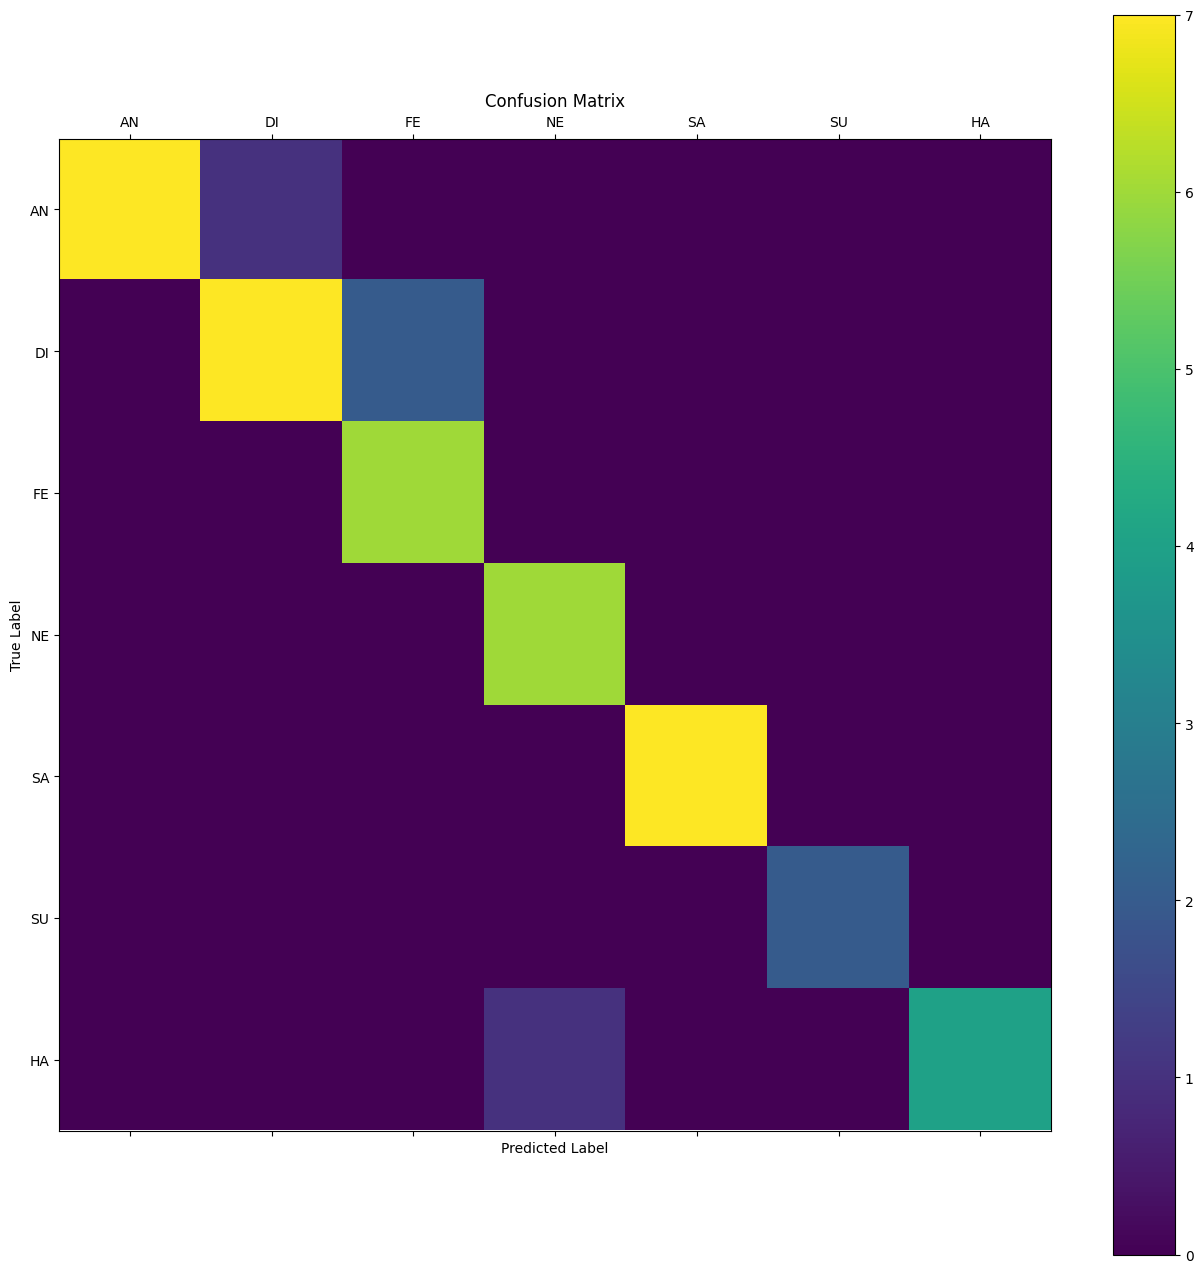

In [30]:
cm = confusion_matrix(test_labels, predicted)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.show()

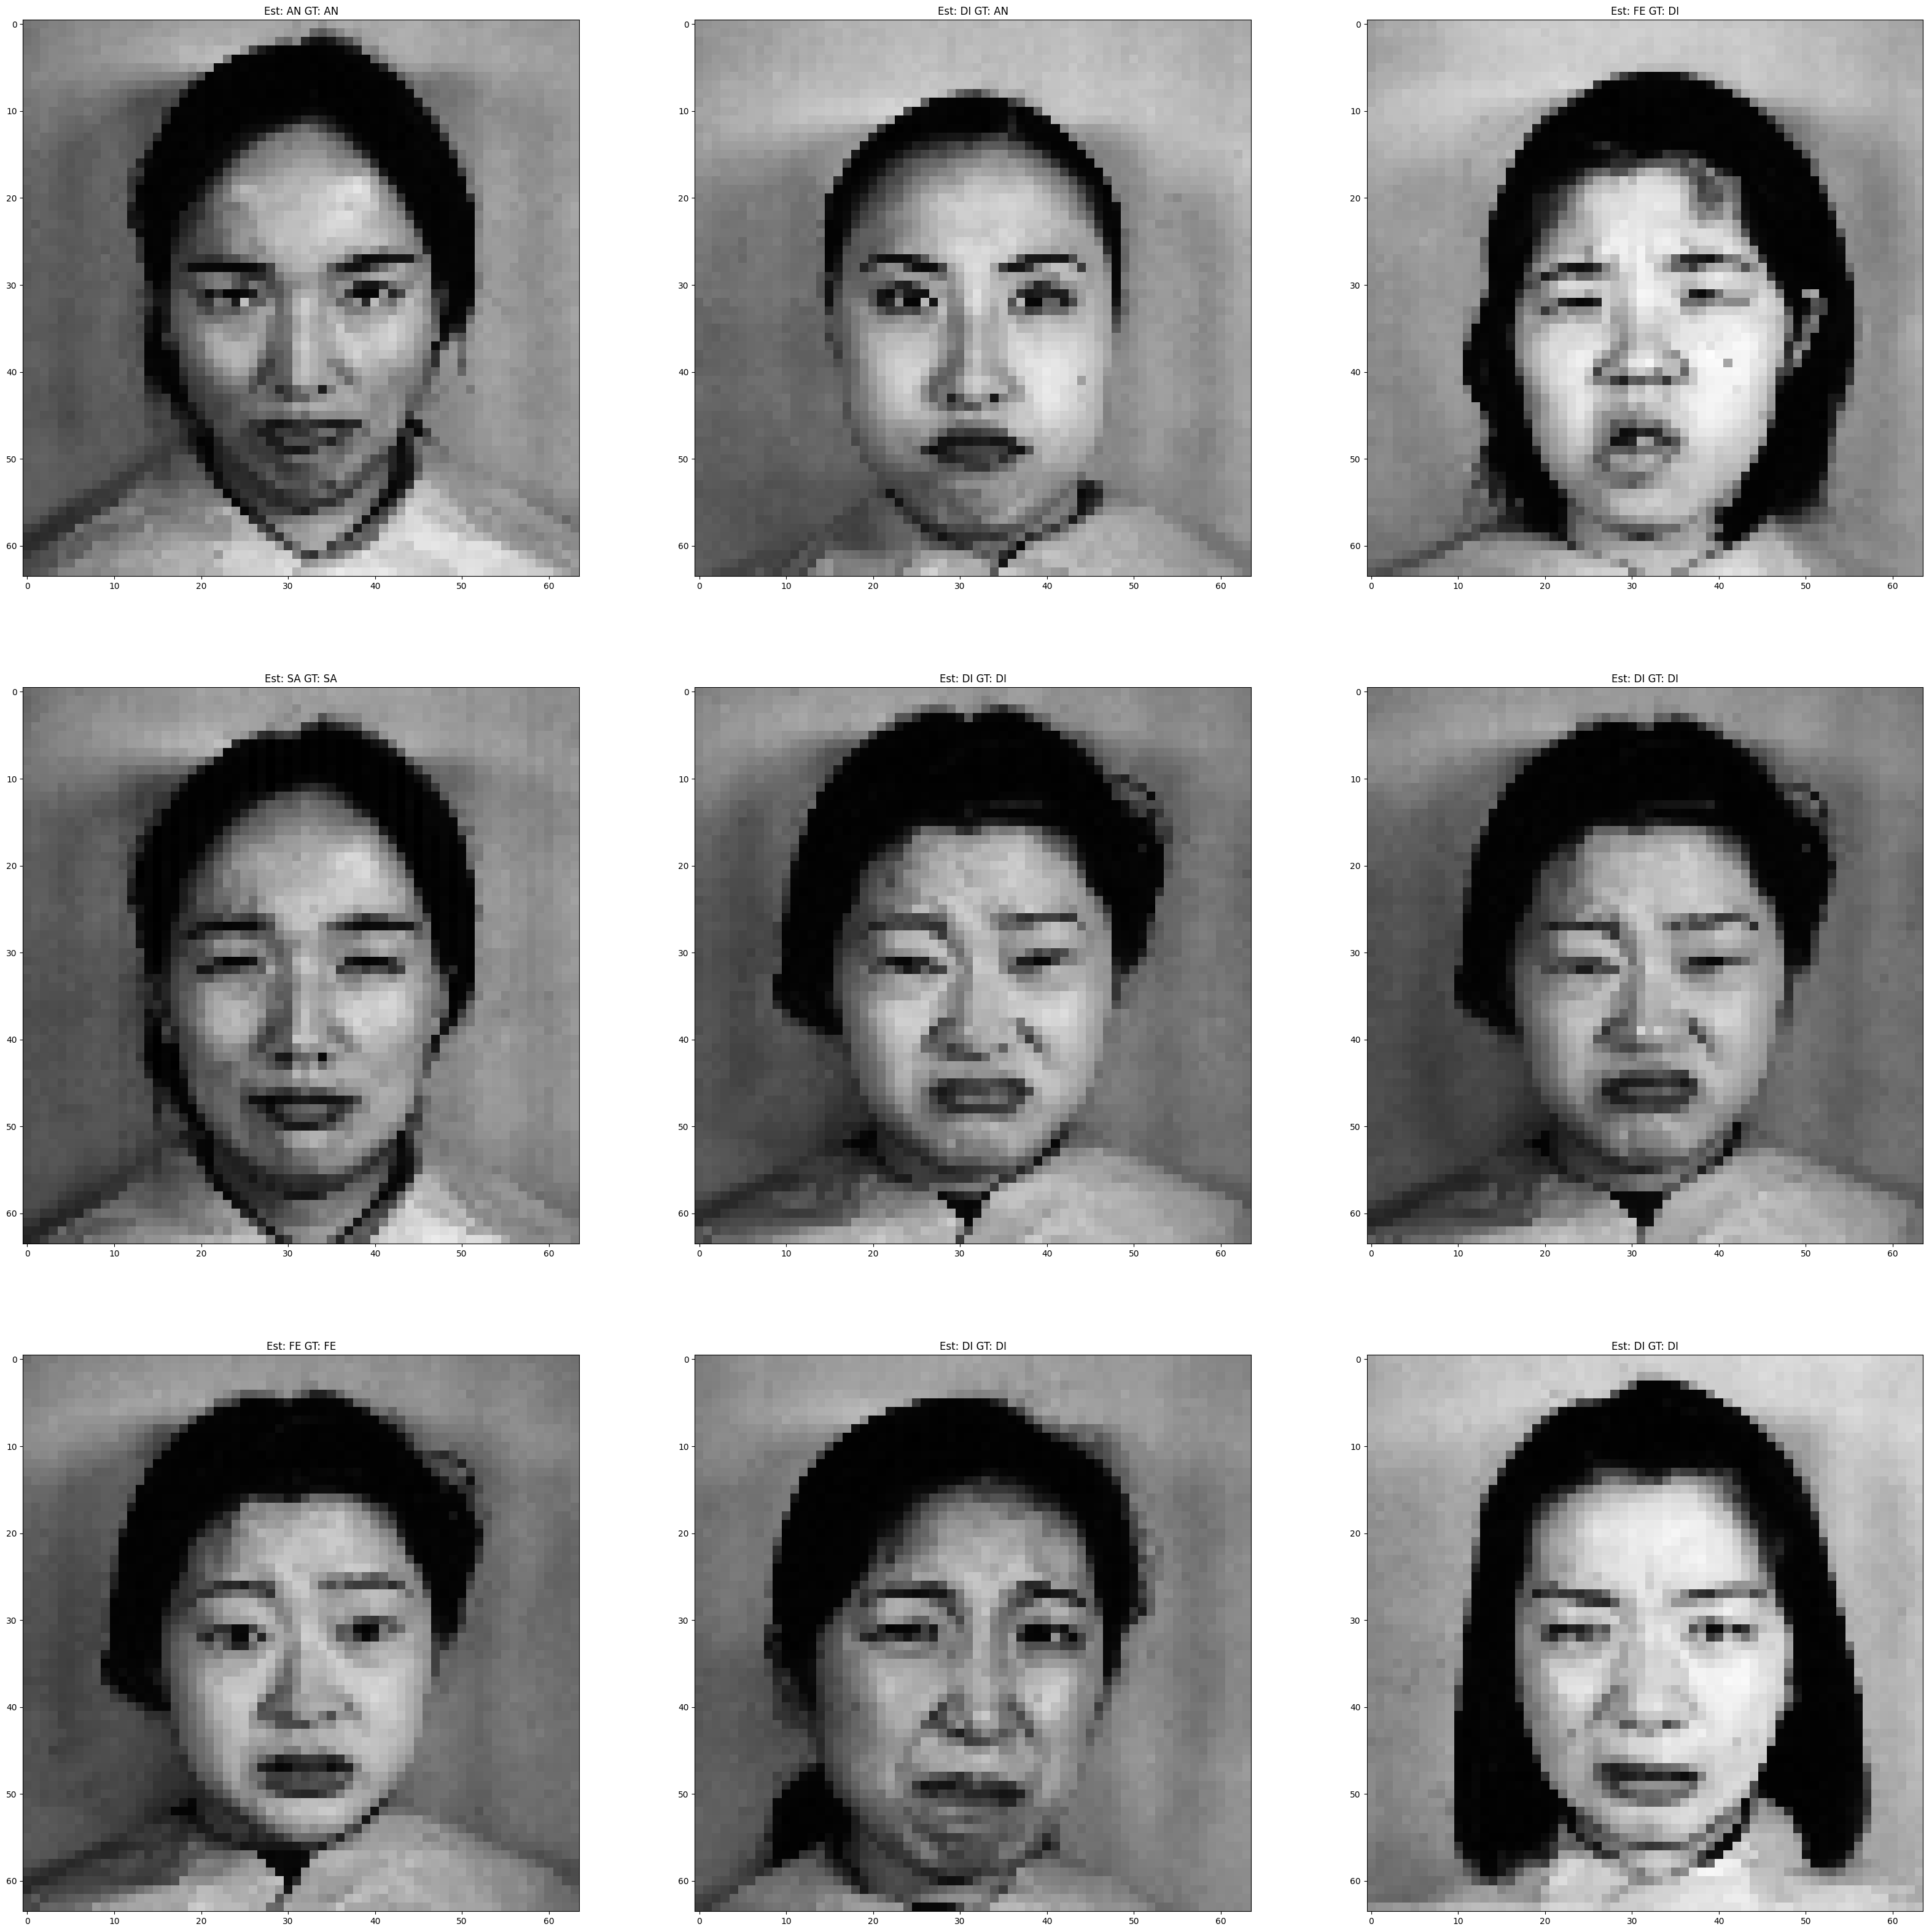

In [31]:
# Create an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N)

for i in range(3):
  for j in range(3):
    index = random.randint(0, len(test_images)-1) # pick a random index
    img = test_images[index].reshape(cols, rows, channels)
    correct_label = test_labels[index]
    predicted_label = predicted[index]

    axs[i, j].imshow(img)
    axs[i, j].set_title("Est: " + int_to_emotion[predicted_label] + " GT: " + int_to_emotion[correct_label])

**Define an MLP model**

In [17]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 200), random_state=1, verbose=True)
print(mlp_classifier)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 200), random_state=1,
              solver='lbfgs', verbose=True)


**Train MLP Model**

In [18]:
# We learn the SVM model on the training data
mlp_classifier.fit(train_images, train_labels)

# Now predict on the test data
predicted = mlp_classifier.predict(test_images)
expected = test_labels

**Results**

In [32]:
print("Classification report for classifier %s:\n%s\n"
      % (mlp_classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 200), random_state=1,
              solver='lbfgs', verbose=True):
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      0.78      0.82         9
           2       0.75      1.00      0.86         6
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2
           6       1.00      0.80      0.89         5

    accuracy                           0.91        43
   macro avg       0.93      0.92      0.92        43
weighted avg       0.92      0.91      0.91        43




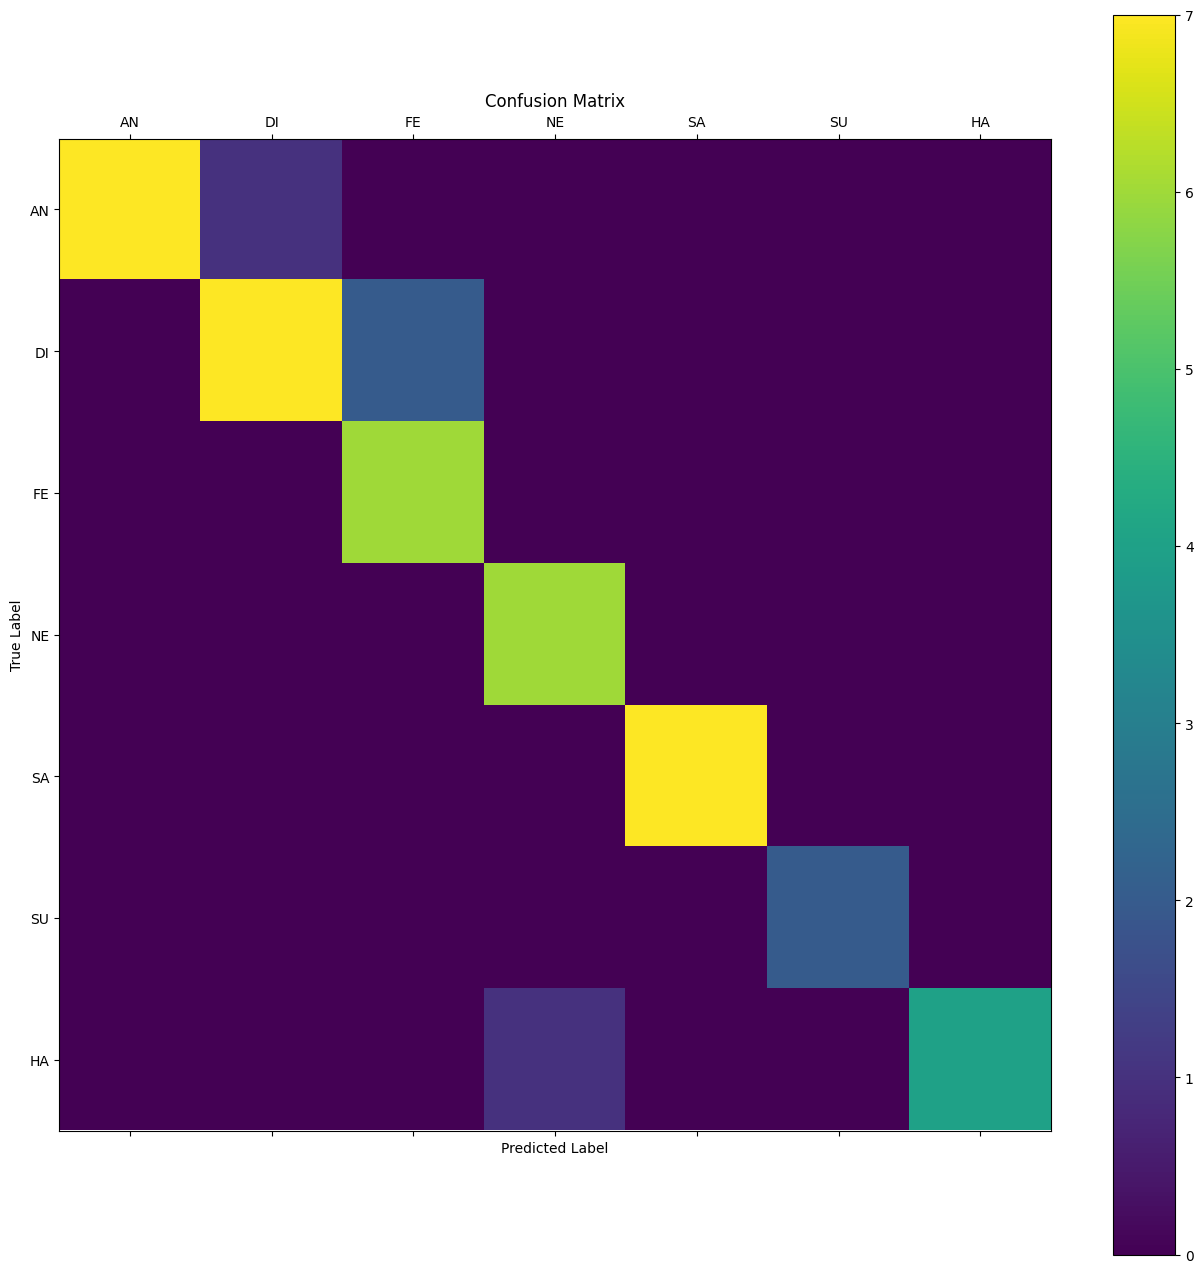

In [33]:
cm = confusion_matrix(test_labels, predicted)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.yticks(ticks=range(0,7), labels=list(emotion_to_int.keys()))
plt.show()

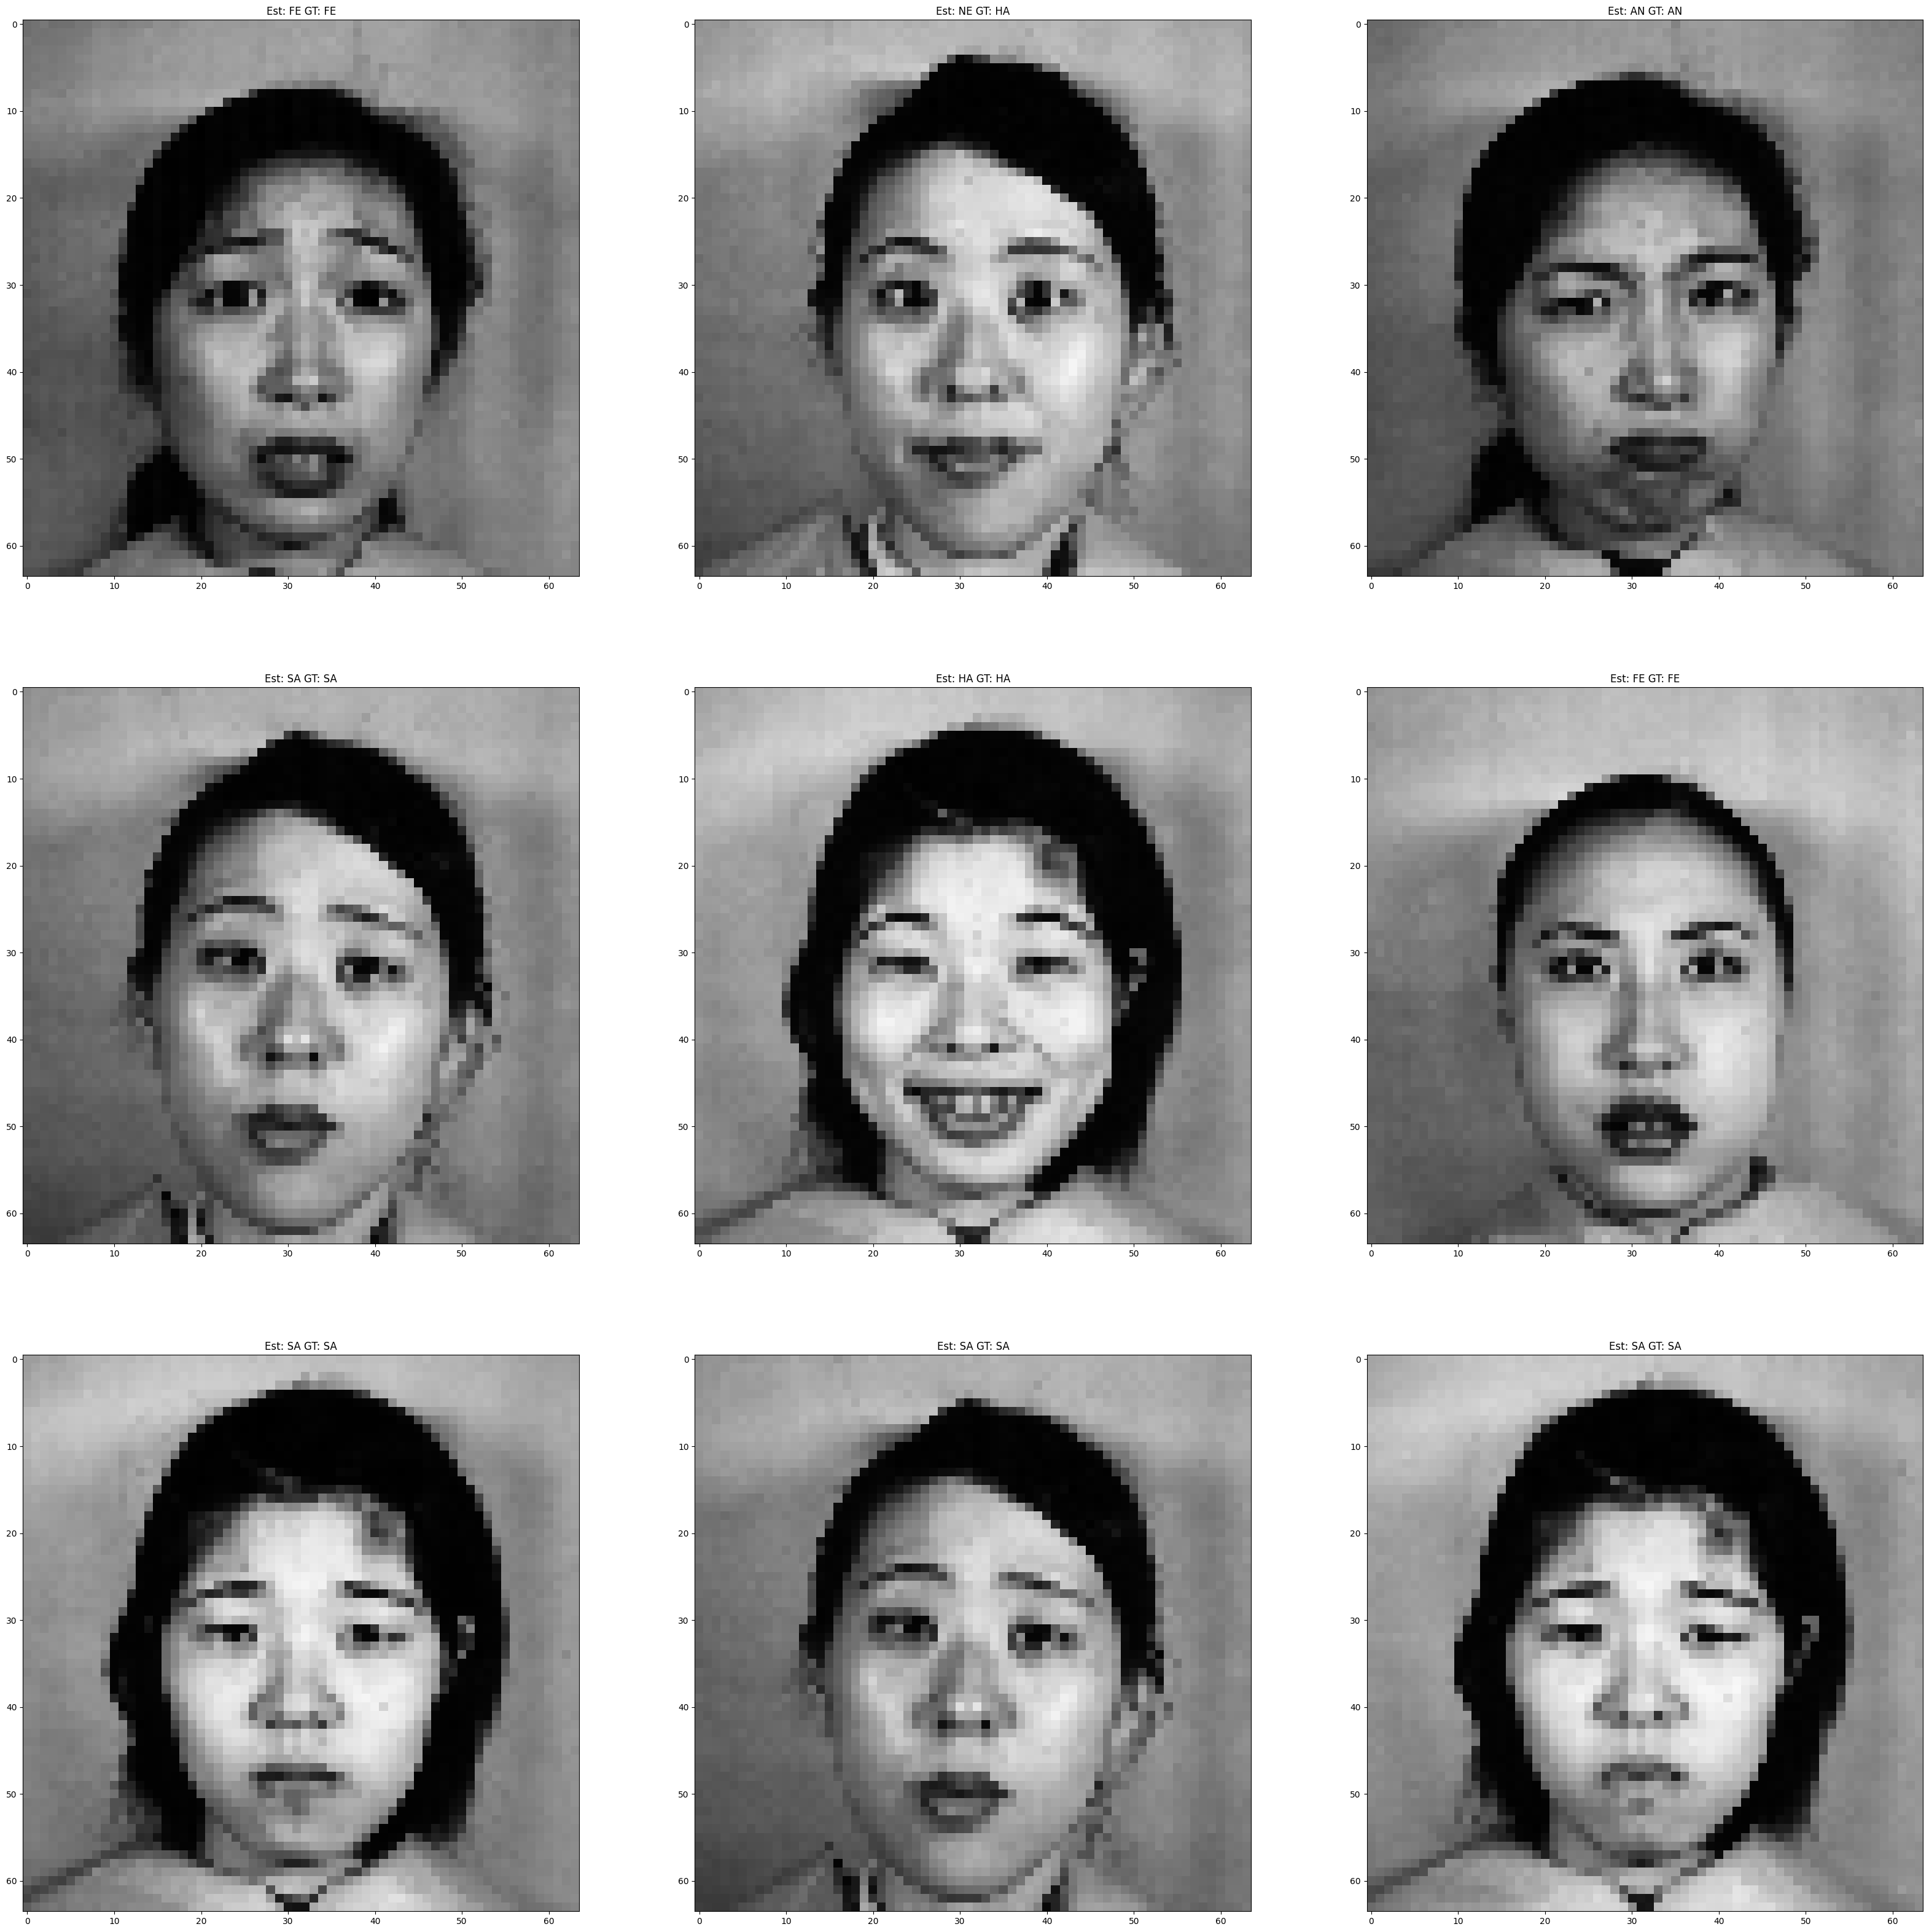

In [34]:
# Create an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N)

for i in range(3):
  for j in range(3):
    index = random.randint(0, len(test_images)-1) # pick a random index
    img = test_images[index].reshape(cols, rows, channels)
    correct_label = test_labels[index]
    predicted_label = predicted[index]

    axs[i, j].imshow(img)
    axs[i, j].set_title("Est: " + int_to_emotion[predicted_label] + " GT: " + int_to_emotion[correct_label])

**Facial Emotion Recognition System**

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.1570 - loss: 1.9699 - val_accuracy: 0.1163 - val_loss: 1.9724
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.1405 - loss: 1.9473 - val_accuracy: 0.1163 - val_loss: 1.9622
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.1805 - loss: 1.9318 - val_accuracy: 0.1163 - val_loss: 1.9681
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.1821 - loss: 1.9360 - val_accuracy: 0.1163 - val_loss: 1.9677
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.1815 - loss: 1.9326 - val_accuracy: 0.1163 - val_loss: 1.9636
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.1222 - loss: 1.9425 - val_accuracy: 0.1163 - val_loss: 1.9645
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.1711 - loss: 1.9298 - val_accuracy: 0.1163 - val_loss: 1.9799
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.1819 - loss: 1.9298 - val_accuracy: 0.1163 - val_loss: 1

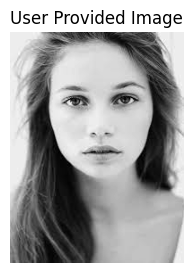

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Detected Emotion: Neutral


In [51]:
# Imports
import zipfile, os, cv2, numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract JAFFE dataset
dataset_path = './jaffedbase/'
with zipfile.ZipFile('./jaffedbase.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

# Emotion labels and loading function
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
def load_jaffe_data(dataset_path):
    images, labels = [], []
    for filename in os.listdir(dataset_path):
        if filename.endswith(".tiff"):
            img_path = os.path.join(dataset_path, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (48, 48))
            images.append(image)
            for idx, emotion in enumerate(emotion_labels):
                if emotion[:2].upper() in filename:
                    labels.append(idx)
                    break
    images = np.array(images).reshape(-1, 48, 48, 1) / 255.0
    labels = to_categorical(labels, len(emotion_labels))
    return images, labels

# Load data
X, y = load_jaffe_data(dataset_path)

# Define model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(emotion_labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Detect emotion in user image and display it
def detect_emotion_in_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Image not found.")
        return

    # Display the provided image in a smaller size
    plt.figure(figsize=(3, 3))  # Set figure size to be smaller (3x3 inches)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title("User Provided Image")
    plt.show()

    # Preprocess and predict
    face_resized = cv2.resize(image, (48, 48))
    face_normalized = face_resized / 255.0
    face_reshaped = np.reshape(face_normalized, (1, 48, 48, 1))
    prediction = model.predict(face_reshaped)
    emotion_index = np.argmax(prediction)
    emotion = emotion_labels[emotion_index]
    print(f"Detected Emotion: {emotion}")

# Set the correct path to your uploaded image in Colab
uploaded_image_path = '/content/picture01.jfif'
detect_emotion_in_image(uploaded_image_path)
